<a href="https://colab.research.google.com/github/mjmklep/Machine-Learning-Group-8/blob/visualization/assignment_ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment template -- ECG data

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [1]:
# import part
import zipfile
import os
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest, shapiro


In [2]:
# Run this to use from colab environment
!git clone https://github.com/jveenland/tm10007_ml.git

import zipfile
import os
import pandas as pd

with zipfile.ZipFile('tm10007_ml/ecg/ecg_data.zip', 'r') as zip_ref:
    zip_ref.extractall('tm10007_ml/ecg')

data = pd.read_csv('/content/tm10007_ml/ecg/ecg_data.csv', index_col=0)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

fatal: destination path 'tm10007_ml' already exists and is not an empty directory.


The number of samples: 827
The number of columns: 9001


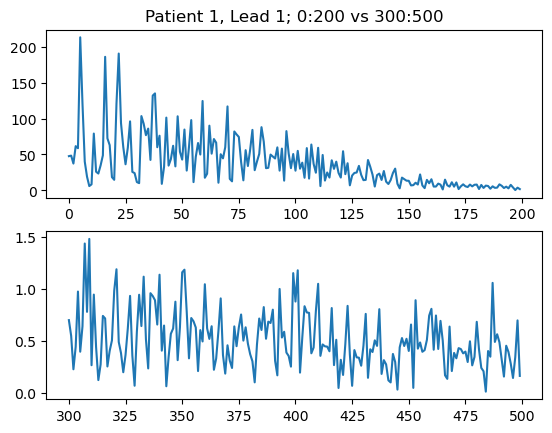

In [28]:
fig, ax = plt.subplots(2,1)
ax[1].plot(range(300,500), data.iloc[0,300:500])
ax[0].set_title("Patient 1, Lead 1; 0:200 vs 300:500")
ax[0].plot(range(0,200), data.iloc[0,:200])
plt.show()

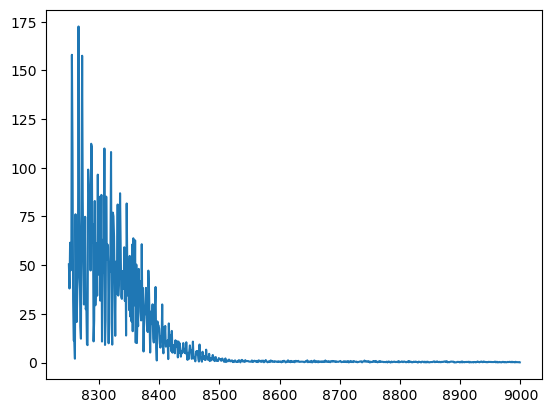

In [29]:
fig, ax = plt.subplots(1,1)
ax.plot(range(8250,9000), data.iloc[0,8250:9000])
plt.show()

In [30]:
labels = data.iloc[:,-1]
print(labels.value_counts())
print(data.head())

label
0    681
1    146
Name: count, dtype: int64
          0_0         0_1         0_2        0_3        0_4         0_5  \
0   47.685046   48.416904   37.371002  61.604757  58.732738  213.067966   
1  152.726718  297.353726  111.168880  25.419423  14.636085   24.609688   
2    1.601260    3.882169   22.978997  21.673040   8.919484   18.329286   
3    1.388947    3.052483    3.084103   4.627886  10.016196   15.020347   
4    3.625561    3.728466    6.205367  17.722897   5.699401    9.024836   

          0_6         0_7         0_8         0_9  ...    11_741    11_742  \
0  120.890451   40.100639   19.106303    6.043738  ...  0.078753  0.379885   
1   49.533842  253.651571  483.852043  167.617409  ...  0.804160  0.809705   
2   27.710604   23.350084   37.896254    8.331180  ...  0.156080  0.102070   
3  139.823127   20.149108   10.393109    9.241921  ...  0.238274  0.096733   
4   15.782812   33.336480   55.257804   19.139128  ...  0.056914  0.059116   

     11_743    11_744    11_74

In [31]:
# Try to find the missing data
missing_values = data.isna().sum()
print(missing_values)



0_0       0
0_1       0
0_2       0
0_3       0
0_4       0
         ..
11_746    0
11_747    0
11_748    0
11_749    0
label     0
Length: 9001, dtype: int64


Normality information

Normal Features: 0
Non-Normal Features: 9001
Transformed Normal Features: 300
Transformed Non-Normal Features: 8701


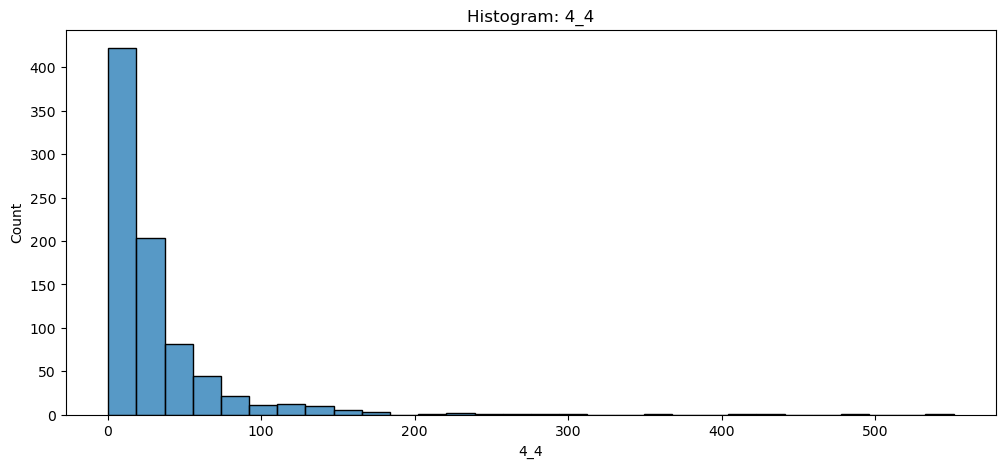

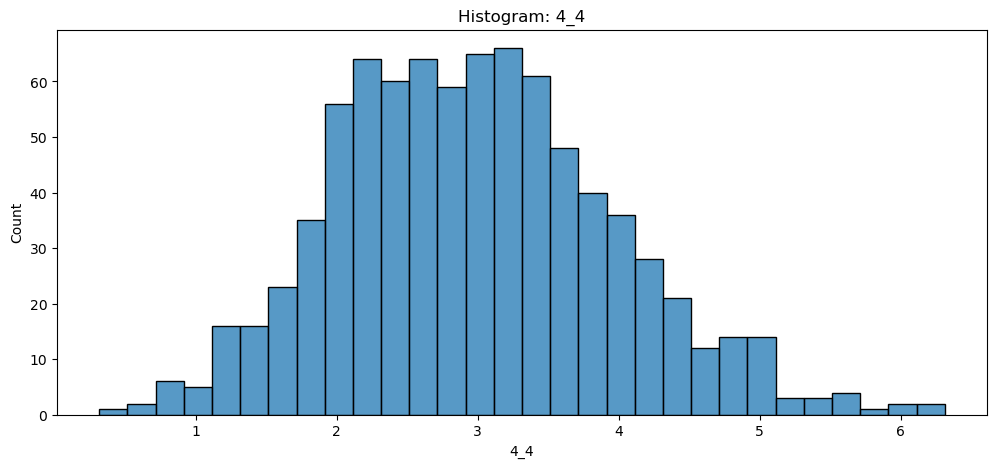

In [3]:
normal_features = []
non_normal_features = []

for feature in data.columns:  # Assuming df is your dataset
    stat, p = shapiro(data[feature])  # Or use normaltest()
    if p > 0.05:
        normal_features.append(feature)
    else:
        non_normal_features.append(feature)

print(f"Normal Features: {len(normal_features)}")
print(f"Non-Normal Features: {len(non_normal_features)}")

t_normal_features = []
t_non_normal_features = []
data_transformed = np.log1p(data)
for feature in data_transformed.columns:  # Assuming df is your dataset
    stat, p = shapiro(data_transformed[feature])  # Or use normaltest()
    if p > 0.05:
        t_normal_features.append(feature)
    else:
        t_non_normal_features.append(feature)

print(f"Transformed Normal Features: {len(t_normal_features)}")
print(f"Transformed Non-Normal Features: {len(t_non_normal_features)}")


def plot_normality(feature_data, feature_name):
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.plot()
    sns.histplot(feature_data, bins=30)
    plt.title(f"Histogram: {feature_name}")

    plt.show()

plot_normality(data['4_4'], '4_4')
plot_normality(data_transformed['4_4'], '4_4')
